In [255]:
# https://archive.ics.uci.edu/ml/datasets/bank+marketing
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
import warnings
warnings.filterwarnings('ignore')

# Ler e analisar os dados

In [257]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/MBA_data/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Conforme ao que foi sugerido, vamos remover a variavel `duration` - "11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model."

In [258]:
df.drop(["duration"], axis=1, inplace=True)

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [260]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [261]:
target_name = "y"

print(df[target_name].unique())

print(sum(df[target_name] == "yes"))

print(sum(df[target_name] == "no"))

['no' 'yes']
4640
36548


Tem quase 10 vezes menos clientes que contrataram o produto "**term deposit**".  
Ou seja, o dataset é desbalanceado.  
Tentaremos lidar com isso mais pra frente.

## Visualizar os dados

### Analisar as variaveis "bank client data"

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_hist(n, df, sel_feats, figsize, fontsize, tight_layout_pad=50, bins=None):
  if n <= 2:
    a, b = 1, n
  else:
    a, b = 2, n // 2 + n % 2
  fig, ax = plt.subplots(a, b, figsize=figsize)
  plt.suptitle("Numerical and Categorical Features", fontsize=2 * fontsize)
  if n == 1:
    sns.countplot(x=sel_feats[0], data=df, ax=ax, hue=target_name)
  else:
    fig.tight_layout(pad=tight_layout_pad)
    for variable, subplot in zip(sel_feats, ax.flatten()):
        subplot.xaxis.get_label().set_fontsize(fontsize)
        subplot.yaxis.get_label().set_fontsize(fontsize)
        subplot.title.set_size(fontsize)
        sns.histplot(x=variable, data=df, ax=subplot, hue=target_name, bins=50)
        for label in subplot.get_xticklabels():
            label.set_rotation(90)
            label.set_fontsize(fontsize)
        for label in subplot.get_yticklabels():
            label.set_fontsize(fontsize)


def plot_all(df, sel_feats, target_name, figsize, fontsize, tight_layout_pad=50):
  sel_feats.append(target_name)
  df_sel_feats = df[sel_feats]
  sel_feats.remove(target_name)
  plot_hist(len(sel_feats), df_sel_feats, sel_feats, figsize, fontsize, tight_layout_pad=tight_layout_pad)

Tambem transformamos a variavel target em um binario, para facilitar as analises com agregaçoes.

In [263]:
df[target_name] = df[target_name].apply(lambda x: 1 if x == "yes" else 0)

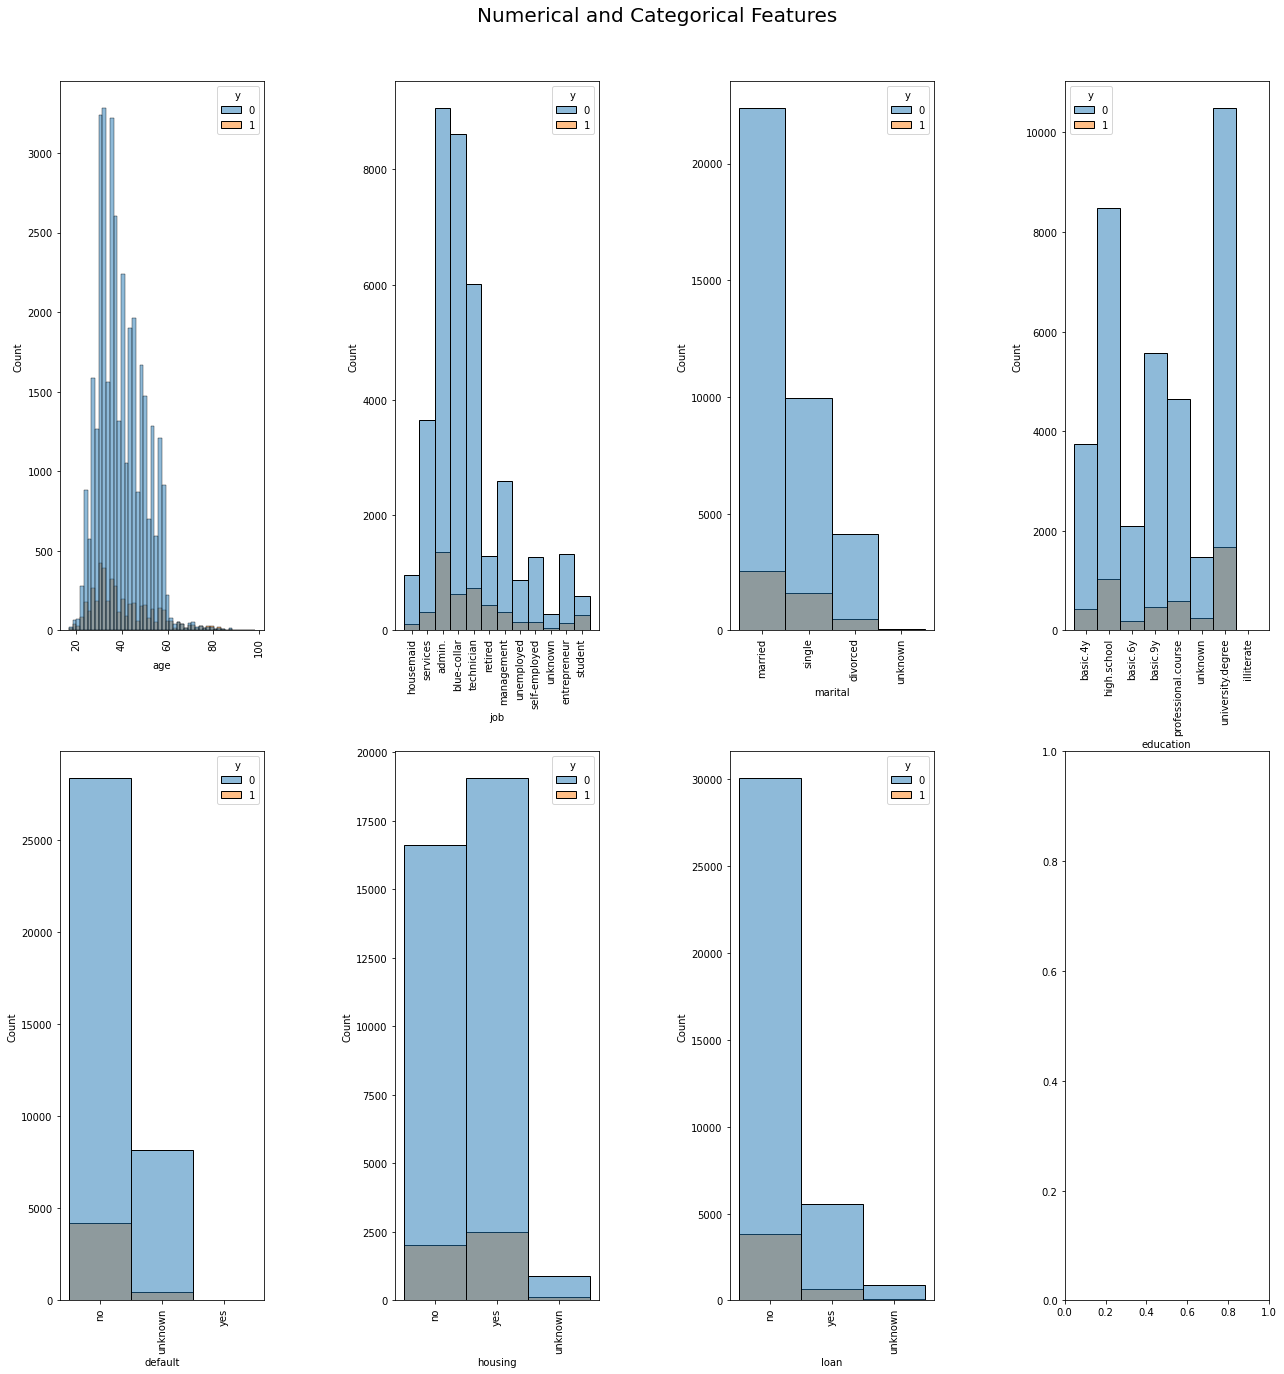

In [264]:
bank_client_data_features = ["age", "job", "marital", "education", "default", "housing", "loan"]

plot_all(df, bank_client_data_features, target_name, (20, 20), 10, 10)
plt.show()

A proporçao de estudantes que contrataram o produto depois da açao de incentivo a compra é alta: quase um terceiro dos estudantes alcançados contrataram esse produto do banco.  
Poderiamos recomendar pra area de negocio mandar mais incentivas para esse seguimento dos clientes. Pois, hoje o alvo das campanhas parece ser mais os trabalhadores da classe media: os clientes `admin.`, `blue-collar`, `technician`.

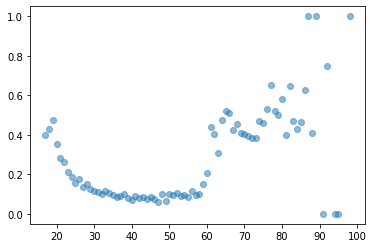

In [265]:
# mean of bin variable = fraction of people who bought the product
propension_by_age = df[["age", target_name]].groupby("age").mean()
plt.plot(propension_by_age, 'o', alpha=0.5)
plt.show()

De acordo com esse grafico de cima, a fraçao de pessoas de mais de 60 anos que contrataram o produto é alta. Porem, como podemos visualizar no histograma, poucos clientes desse seguimento foram alcançados. Poderiamos sugerir pra area de negocio aumentar a quantidade de campanhas emitidas para esse seguimento especifico.  
Constatamos tambem a nao linearidade da relaçao entre a idade e a propensao a contratar o produto. Poderiamos adicionar a variavel idade elevada ao quadrado na fase de concepçao de novas features para melhorar o resultado de uma regressao logistica, por exemplo.

### Analisar as variaveis "related with the last contact of the current campaign"

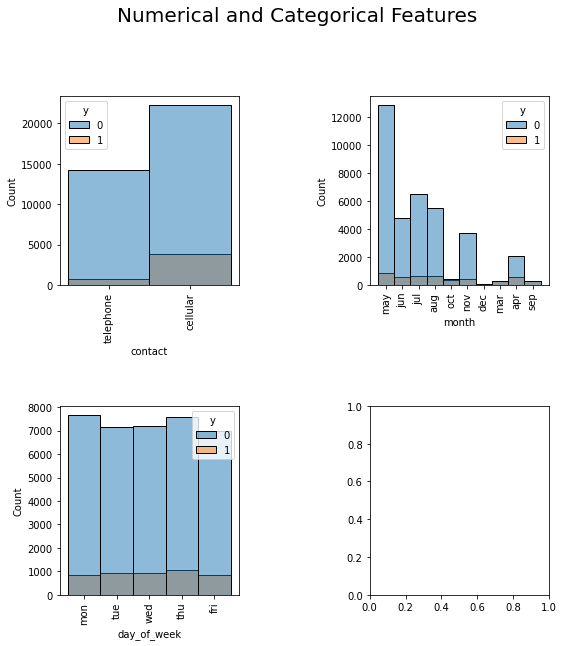

In [266]:
contact_current_campaign_features = ["contact", "month", "day_of_week"]

plot_all(df, contact_current_campaign_features, target_name, (10, 10), 10, 10)
plt.show()

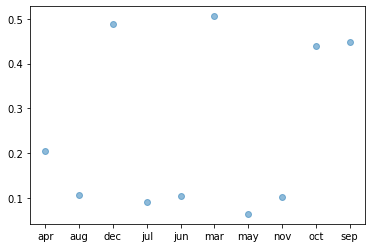

In [267]:
propension_by_month = df[["month", target_name]].groupby("month").mean()
plt.plot(propension_by_month, 'o', alpha=0.5)
plt.show()

Percebemos que o foco da area de negocio para o ultimo contato na campanha atual foi o mes de maio.  
A intuiçao pode ter sido que os meses mais distante do Natal sao associados a menos gastos e a iniciativas de investimento (contrataçao de um *term deposit*, por exemplo).  
Porem, demais campanhas estao sendo realizada nesse mes e com pouco retorno no investimento. Uma dica boa seria de tentar distribuir melhor as campanhas nos outros meses. Por exemplo, os meses de março, setembro, outubro e dezembro tiveram retornos muito bons e quase nao foram explorados.  
Essas proporçoes altas de contrataçoes nesses meses especificos pode ser devidos a uma maior qualidade das campanhas, pois bem menos foram geradas, ou seja, mais esforços e mais minutos foram passados nas ligaçoes com o cliente para convence-lo.  
Um risco com a distribuiçao atual é que o nosso modelo generalizasse mal em produçao. O nosso modelo, se for baseado em arvores por exemplo, provavelmente vai atribuir mais importancia a essa feature porque ela separa as classes positivas e negativas muito bem.   
Coletar mais dados nesses meses ajudaria a deixar essa variavel de prediçao mais objetiva. O que ajudaria tambem seria de coletar novas features como o tempo passado na ligaçao, etc que sao mais representativas da qualidade da campanha, e eventualmente remover essa feature se a gente for usar um modelo baseado em arvores.

### Analisar as variaveis "other attributes"

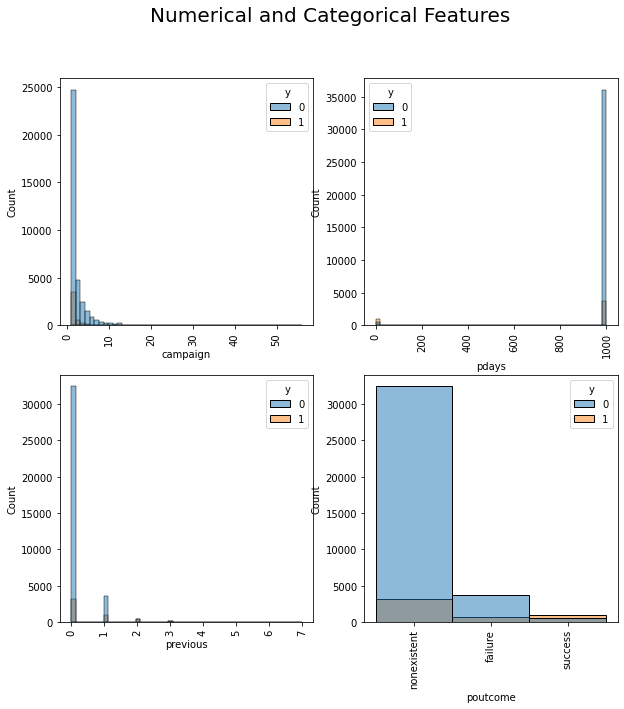

In [268]:
other_attributes_features = ["campaign", "pdays", "previous", "poutcome"]

plot_all(df, other_attributes_features, target_name, (10, 10), 10)
plt.show()

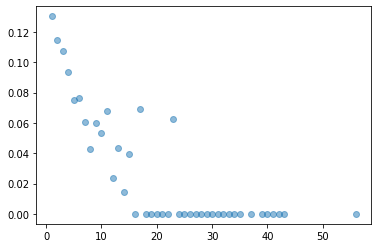

In [269]:
propension_by_campaign = df[["campaign", target_name]].groupby("campaign").mean()
plt.plot(propension_by_campaign, 'o', alpha=0.5)
plt.show()

Menos contatos com o mesmo cliente tiveram nesta campanha, maior parecem ser as chances de conseguir a contrataçao do produto.  

In [270]:
sum(df.loc[df["campaign"] > 15, "y"] == "yes")

0

Uma dica pra area de negocio seria de evitar mais de 15 contatos com o mesmo cliente na mesma campanha (`campaign`). Pois o retorno no investimento é realmente muito fraco. 
A intuiçao é que depois de 15 contatos, os clientes ja estao sabendo do produto e conseguem se lembrar dos principais detalhes. Mais contatos poderia até prejudicar a compra ou no melhor caso, isso aumenta bastante o custo da campanha.  
Podemos tambem limitar a quantidade de contatos com o mesmo cliente a 15 na fase de transformaçao de features, para deixar a relaçao mais linear.

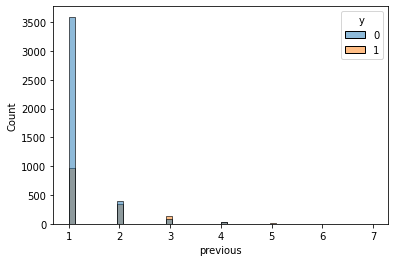

In [271]:
sns.histplot(x="previous", data=df.loc[df["previous"] > 0], hue=target_name, bins=50)
plt.show()

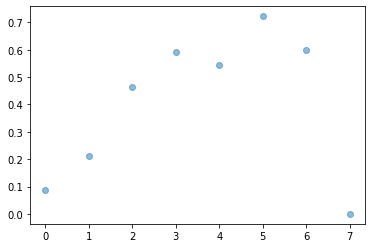

In [272]:
propension_by_previous = df[["previous", target_name]].groupby("previous").mean()
plt.plot(propension_by_previous, 'o', alpha=0.5)
plt.show()

Parece bom manter uma certa regularidade no ritmo de entrar em contato com o mesmo cliente ao longo do ano (`previous`). Clientes que tiveram 2 ou mais contatos antes dessa campanha foram alvos mais faceis para a campanha atual (mais da metade de conversao numa contrataçao do produto).

Parece que o sucesso de uma campanha anterior (`poutcome`) favorece o sucesso da campanha atual. Porem, seria bom coletar mais dados desse seguimento para conseguir ter mais confiança nessa suposiçao.  
Uma dica para o pessoal de negocio seria de fazer novas ligaçoes para os clientes que deram um retorno positivo nas outras campanhas.

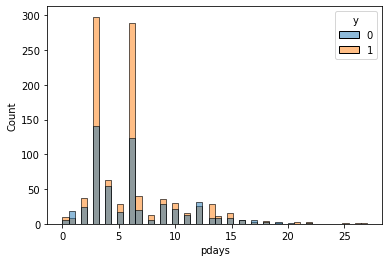

In [273]:
sns.histplot(x="pdays", data=df.loc[df["pdays"] != 999], hue=target_name, bins=50)
plt.show()

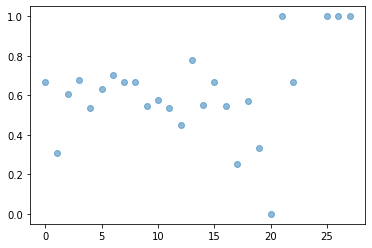

In [274]:
propension_by_pdays = df.loc[df["pdays"] != 999, ["pdays", target_name]].groupby("pdays").mean()
plt.plot(propension_by_pdays, 'o', alpha=0.5)
plt.show()

O fator de ter sido o alvo de uma campanha no mes anterior parece ser um fator importante de contrataçao do produto na campanha atual (`pdays`).  
Se for mais recente ou mais tarde dentro de 30 dias, nao parece ter tanta importancia. De fato, poderiamos pensar em trocar essa coluna por uma **flag binaria** com o valor 1 se o cliente foi alvo de uma campanha anterior.

### Analisar as variaveis "social and economic context attributes"

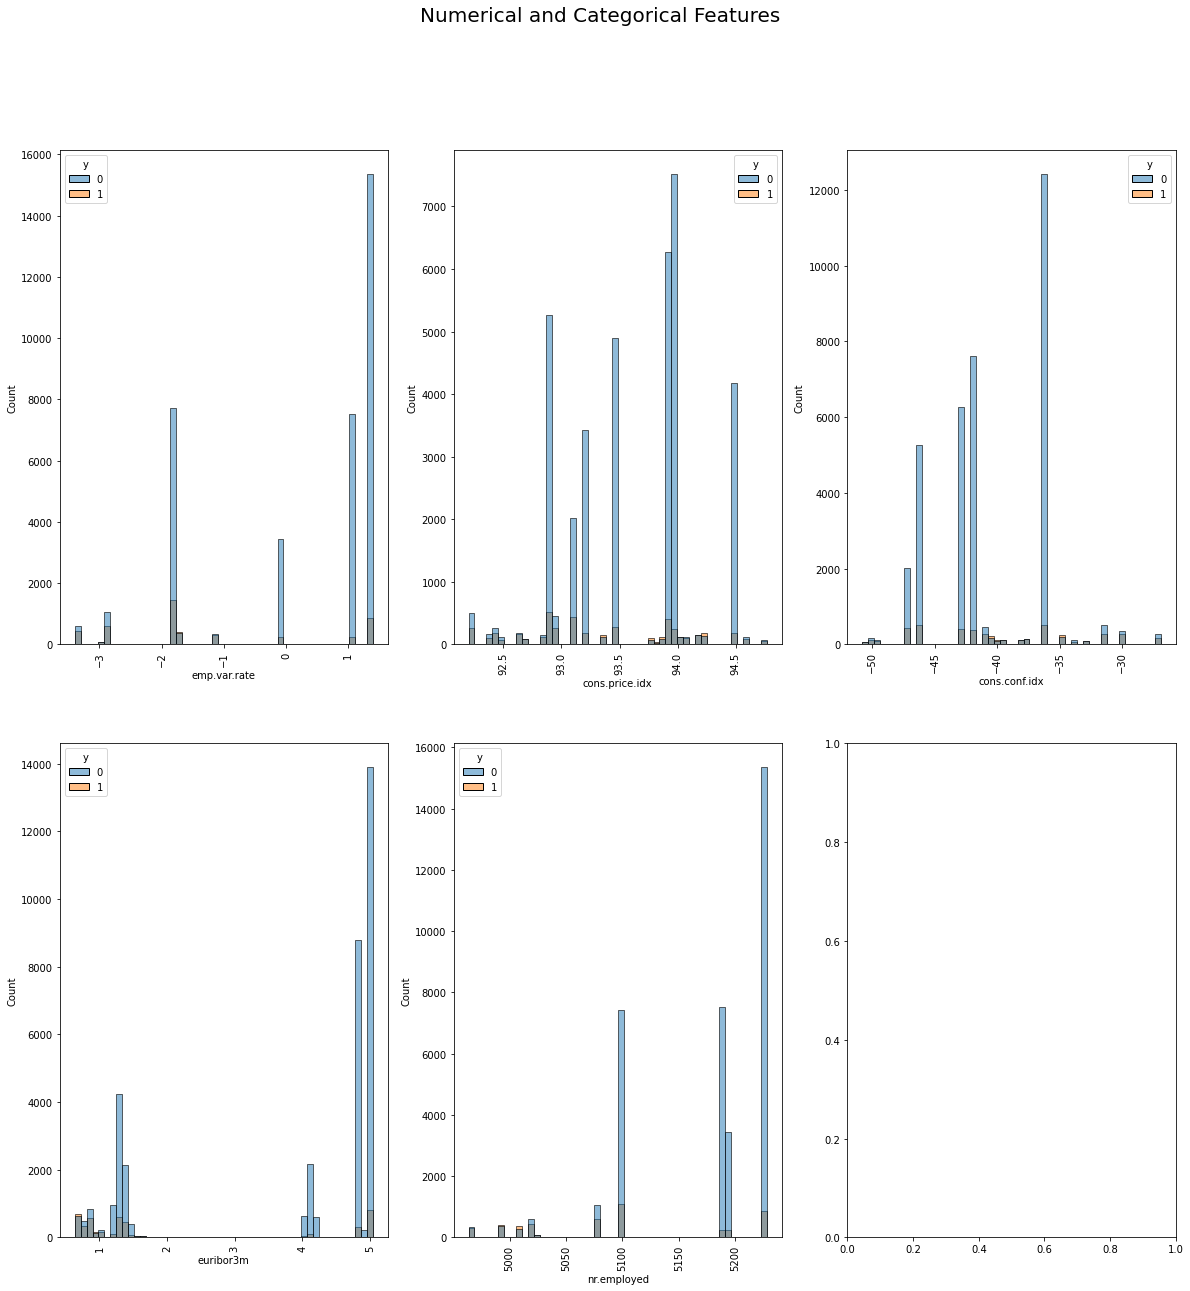

In [275]:
social_economic_features = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

plot_all(df, social_economic_features, target_name, (20, 20), 10)
plt.show()

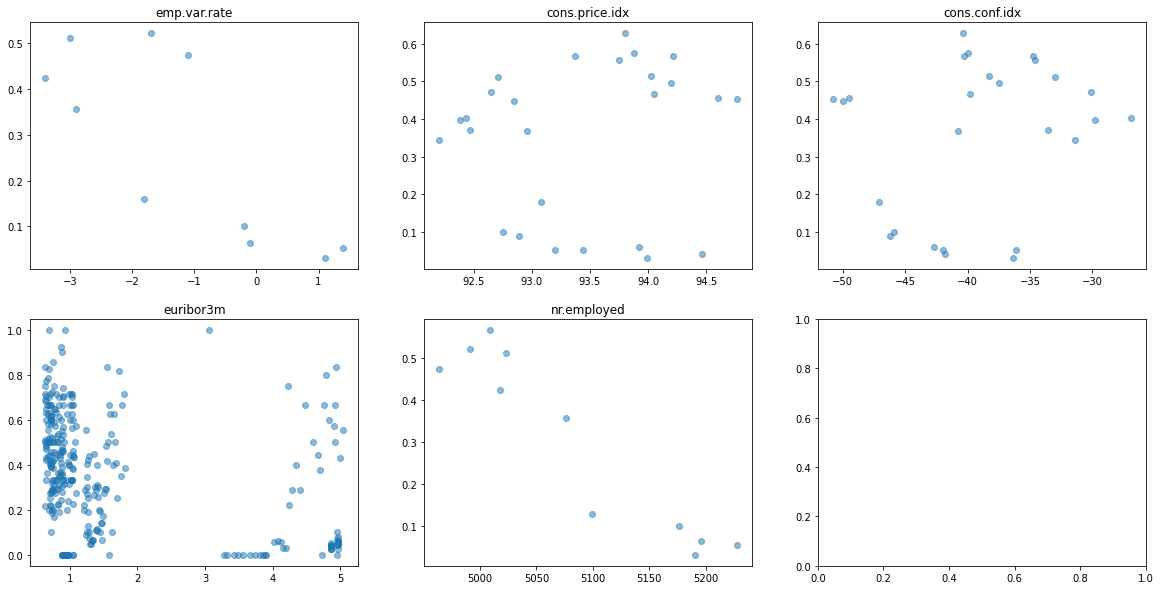

In [276]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for col, subplot in zip(social_economic_features, ax.flatten()):
  propension_by_col = df[[col, target_name]].groupby(col).mean()
  subplot.plot(propension_by_col, 'o', alpha=0.5)
  subplot.set_title(col)
plt.show()

As features `cons.price.idx`, `cons.conf.idx` e `euribor3m` isoladas nao parecem ter algum relacionamento com a fraçao de contrataçoes do produto.  
Precisaria provavelmente do conhecimento de um professional da area para conseguir tirar algum valor dessas variaveis. Sem alguma transformaçao util, essas variaveis podem causar ruidos na nossa modelagem.  
Vamos remover elas do nosso dataset na proxima etapa de *feature engineering*.

# Separar set de treinamento e set de teste

In [277]:
y = df[target_name]
X = df.drop([target_name], axis=1)

In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [279]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
8505,43,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,4,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
28321,35,admin.,married,high.school,no,yes,no,cellular,apr,wed,1,999,0,nonexistent,-1.8,93.075,-47.1,1.445,5099.1
2582,34,management,married,university.degree,no,yes,no,telephone,may,tue,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
9407,49,blue-collar,married,basic.4y,unknown,no,no,telephone,jun,fri,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
33934,52,admin.,married,basic.9y,no,yes,no,cellular,may,wed,2,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1


# Preparaçao dos dados

## Encoding do target

In [280]:
y_train_encoded = y_train.apply(lambda x: 1 if (x == "yes" or x == 1) else 0)

## Encoding das variaveis de categoria

In [281]:
cat_cols = X_train.columns[X_train.dtypes == object]
num_cols = list(set(X_train.columns) - set(cat_cols))

In [282]:
## One-hot encode categorical features
# drop_first : we remove the first encoded column, as it is redundant and can be infered from the others
train_cat_encoded = pd.get_dummies(data = X_train, columns = cat_cols, drop_first = True)

In [283]:
# Merge the non-numerical with the scaled numerical data
X_train_encoded = train_cat_encoded.merge(
    right=X_train[num_cols],
    how='left',
    left_index=True,
    right_index=True)
X_train_encoded.head()

,age_x,campaign_x,pdays_x,previous_x,emp.var.rate_x,cons.price.idx_x,cons.conf.idx_x,euribor3m_x,nr.employed_x,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,campaign_y,age_y,euribor3m_y,nr.employed_y,emp.var.rate_y,pdays_y,previous_y,cons.conf.idx_y,cons.price.idx_y
8505,43,4,999,0,1.4,94.465,-41.8,4.864,5228.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4,43,4.864,5228.1,1.4,999,0,-41.8,94.465
28321,35,1,999,0,-1.8,93.075,-47.1,1.445,5099.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,35,1.445,5099.1,-1.8,999,0,-47.1,93.075
2582,34,3,999,0,1.1,93.994,-36.4,4.856,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,3,34,4.856,5191.0,1.1,999,0,-36.4,93.994
9407,49,4,999,0,1.4,94.465,-41.8,4.967,5228.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,4,49,4.967,5228.1,1.4,999,0,-41.8,94.465
33934,52,2,999,1,-1.8,92.893,-46.2,1.281,5099.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,52,1.281,5099.1,-1.8,999,1,-46.2,92.893


Encapsulamos o nosso codigo de preprocessamento completo dentro da funcionalidade `preprocess` seguinte:

In [284]:
def preprocess(X, y, cat_cols, num_cols):
  ## target label encoding
  y_encoded = None
  if y is not None:
    y_encoded = y.apply(lambda x: 1 if (x == "yes" or x == 1) else 0)
  ## OH encoding
  # drop_first : we remove the first encoded column, as it is redundant and can be infered from the others
  cat_encoded = None
  if cat_cols is not None:
    cat_encoded = pd.get_dummies(data = X, columns = cat_cols, drop_first = True)
  else:
    return X, y_encoded
  # Merge the non-numerical with the scaled numerical data
  if num_cols is not None:
    X_encoded = cat_encoded.merge(
        right=X[num_cols],
        how='left',
        left_index=True,
        right_index=True)
    return X_encoded, y_encoded
  else:
    return cat_encoded, y_encoded

# Estabelecer uma baseline

A metrica que vamos usar num primeiro tempo é o score **AUC**, que avalia a habilidade do nosso model em diferenciar as classes positivas das classes negativas.

In [285]:
X_test_encoded, y_test_encoded = preprocess(X_test, y_test, cat_cols, num_cols)

In [286]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_encoded, y_train_encoded)

In [287]:
print("Accuracy on train set: ", clf.score(X_train_encoded, y_train_encoded))
print("Accuracy on test set: ", clf.score(X_test_encoded, y_test_encoded))

Accuracy on train set:  0.8999818807755028
Accuracy on test set:  0.8985507246376812


In [288]:
from sklearn.metrics import roc_auc_score

print("AUC on train set: ", roc_auc_score(y_train_encoded, clf.predict_proba(X_train_encoded)[:, 1]))
print("AUC on test set: ", roc_auc_score(y_test_encoded, clf.predict_proba(X_test_encoded)[:, 1]))

AUC on train set:  0.7624098017181247
AUC on test set:  0.7638638155318555


Encapsulamos esse codigo de avaliaçao da baseline para conseguir reaproveita-lo:

In [289]:
from sklearn.linear_model import LogisticRegression


def train_eval_baseline(X_train, y_train, X_test, y_test, cat_cols, num_cols):
  X_train_encoded, y_train_encoded = preprocess(X_train, y_train, cat_cols, num_cols)
  X_test_encoded, y_test_encoded = preprocess(X_test, y_test, cat_cols, num_cols)

  clf = LogisticRegression(random_state=0).fit(X_train_encoded, y_train_encoded)

  print("Accuracy on train set: ", clf.score(X_train_encoded, y_train_encoded))
  print("Accuracy on test set: ", clf.score(X_test_encoded, y_test_encoded))

  print("AUC on train set: ", roc_auc_score(y_train_encoded, clf.predict_proba(X_train_encoded)[:, 1]))
  print("AUC on test set: ", roc_auc_score(y_test_encoded, clf.predict_proba(X_test_encoded)[:, 1]))

# Feature engineering

## Features simples

In [290]:
def feature_engineering(X):
  # binary flag instead of pdays
  mask_pdays = X["pdays"] != 999
  X.loc[mask_pdays, "contacted_from_prev_camp"] = 1
  X.loc[~mask_pdays, "contacted_from_prev_camp"] = 0
  X.drop(["pdays"], axis=1, inplace=True)

  # limit contact with the same client
  X.loc[X["campaign"] > 15, "campaign"] = 15

  # age power 2
  X.loc[:, "age2"] = X["age"] ** 2

  # remove noisy features
  X.drop(["cons.price.idx", "cons.conf.idx", "euribor3m"], axis=1, inplace=True)

In [291]:
feature_engineering(X_train)
feature_engineering(X_test)

In [292]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,nr.employed,contacted_from_prev_camp,age2
8505,43,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,4,0,nonexistent,1.4,5228.1,0.0,1849
28321,35,admin.,married,high.school,no,yes,no,cellular,apr,wed,1,0,nonexistent,-1.8,5099.1,0.0,1225
2582,34,management,married,university.degree,no,yes,no,telephone,may,tue,3,0,nonexistent,1.1,5191.0,0.0,1156
9407,49,blue-collar,married,basic.4y,unknown,no,no,telephone,jun,fri,4,0,nonexistent,1.4,5228.1,0.0,2401
33934,52,admin.,married,basic.9y,no,yes,no,cellular,may,wed,2,1,failure,-1.8,5099.1,0.0,2704


In [293]:
cat_cols = X_train.columns[X_train.dtypes == object]
num_cols = list(set(X_train.columns) - set(cat_cols))

train_eval_baseline(X_train, y_train, X_test, y_test, cat_cols, num_cols)

Accuracy on train set:  0.8961768436310926
Accuracy on test set:  0.8973736482012801
AUC on train set:  0.7827946897390686
AUC on test set:  0.7740623727743745


O nosso **AUC** subiu de 0.01 comparado a sem as transformaçoes de features.

## Features mais complexas

In [294]:
from sklearn.cluster import KMeans
import numpy as np

# Find optimal number of clusters
def find_optimal_k_elbow(df, chart_name):
    # Create empty sse dictionary
    sse = {}
    
    # Fit KMeans algorithm on k values between 1 and 11
    for k in range(1, 30):
        kmeans = KMeans(n_clusters=k, random_state=333)
        kmeans.fit(df)
        sse[k] = kmeans.inertia_
    
    # Add the title to the plot
    plt.title('Elbow criterion ' + chart_name + ' data chart')
    
    # Create and display a scatter plot
    xx = list(sse.keys())
    yy = list(sse.values())
    sns.pointplot(x=xx, y=yy)
    plt.show()
    return xx,yy

def optimal_number_of_clusters(x1, x2, y1, y2, wcss):
    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2


def get_optimal_number_of_clusters(df, chart_name):
    xx, yy = find_optimal_k_elbow(df, chart_name)
    # calculating the within clusters sum-of-squares for 19 cluster amounts
    x1 = xx[0]
    y1 = yy[0]
    x2 = xx[len(xx)-1]
    y2 = yy[len(yy)-1]
    
    # calculating the optimal number of clusters
    n = optimal_number_of_clusters(x1, x2, y1, y2, yy)
    return n

Os dados socio-economicos estao fora do nosso conhecimento, mas podemos tentar gerar uma nova feature baseada neles a partir de uma seguimentaçao `K-Means`.  
Assim, os clientes com os fatores socio-economicos mais similares serao associados ao mesmo seguimento. Isso pode ajudar o modelo conseguir o entendimento de algum padrao mais complexo.

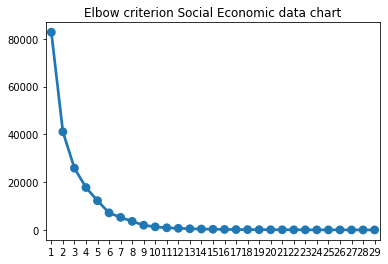

Quantidade de clusters otimal:  7


In [295]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Standardize
social_economic_features = ["cons.price.idx", "cons.conf.idx", "euribor3m"]
X_train_scaled = X_train.loc[:, social_economic_features]
X_train_scaled = (X_train_scaled - X_train_scaled.mean(axis=0)) / X_train_scaled.std(axis=0)

X_test_scaled = X_test.loc[:, social_economic_features]
X_test_scaled = (X_test_scaled - X_test_scaled.mean(axis=0)) / X_test_scaled.std(axis=0)

X_train_encoded, y_train_encoded = preprocess(X_train_scaled[social_economic_features], y_train, None, social_economic_features)
X_test_encoded, y_test_encoded = preprocess(X_test_scaled[social_economic_features], y_test, None, social_economic_features)
n = get_optimal_number_of_clusters(X_train_encoded, chart_name="Social Economic")
print("Quantidade de clusters otimal: ", n)

In [296]:
X_train_encoded.shape

(27595, 3)

In [297]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.cluster import KMeans


class KMeansFeaturizer:
  """Transforms numeric data into k-means cluster memberships.

  This transformer runs k-means on the input data and converts each data point
  into the ID of the closest cluster. If a target variable is present, it is 
  scaled and included as input to k-means in order to derive clusters that
  obey the classification boundary as well as group similar points together.
  """
  def __init__(
      self,
      k=100,
      target_scale=5.0,
      random_state=None,
      ):
    self.k = k
    self.target_scale = target_scale
    self.random_state = random_state
    self.km_model_ = None

  def fit(self, X, y=None):
    if y is None:
      # No target variable, just do plain k-means
      km_model = KMeans(n_clusters=self.k, n_init=20, random_state=self.random_state)
      self.km_model_ = km_model.fit(X)
      self.cluster_centers_ = km_model.cluster_centers_
      return self

    # There is target information. Apply appropriate scaling and include
    # it in the input data to k-means.
    data_with_target = np.hstack((X, y[:, np.newaxis]
            * self.target_scale))
    # Build a pre-training k-means model on data and target
    km_model_pretrain = KMeans(n_clusters=self.k, n_init=20,
                              random_state=self.random_state)
    km_model_pretrain.fit(data_with_target)

    # Run k-means a second time to get the clusters in the original space
    # without target info. Initialize using centroids found in pre-training.
    # Go through a single iteration of cluster assignment and centroid 
    # recomputation.
    km_model = KMeans(n_clusters=self.k,
                      init=km_model_pretrain.cluster_centers_[:,:-1],
                      n_init=1, max_iter=1)
    km_model.fit(X)
    self.km_model_ = km_model
    self.cluster_centers_ = km_model.cluster_centers_
    return self

  def transform(self, X, y=None):
    clusters = self.km_model_.predict(X)
    return clusters[:, np.newaxis]

  def fit_transform(self, X, y=None):
    self.fit(X, y)
    return self.transform(X, y)

In [298]:
from scipy.spatial import Voronoi, voronoi_plot_2d

kmf_hint = KMeansFeaturizer(k=7, target_scale=10, random_state=42)
kmf_hint = kmf_hint.fit(X_train_encoded, y_train)
print(kmf_hint.km_model_)

KMeans(algorithm='auto', copy_x=True,
       init=array([[ 0.35437161,  0.90642222,  0.68652124],
       [-0.00213653, -0.43425665, -0.62030059],
       [-0.653286  , -0.32281909,  0.28202015],
       [-1.04882105, -1.19572844, -1.33122839],
       [ 0.98051997, -0.41589425,  0.69578474],
       [-1.8029016 ,  2.06765768, -1.63437706],
       [-1.57807378,  1.99148729, -1.64762933]]),
       max_iter=1, n_clusters=7, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)


In [299]:
training_cluster_features = kmf_hint.transform(X_train_encoded)
test_cluster_features = kmf_hint.transform(X_test_encoded)

# New complex engineered feature
X_train["social_economic_segment"] = training_cluster_features
X_test["social_economic_segment"] = test_cluster_features

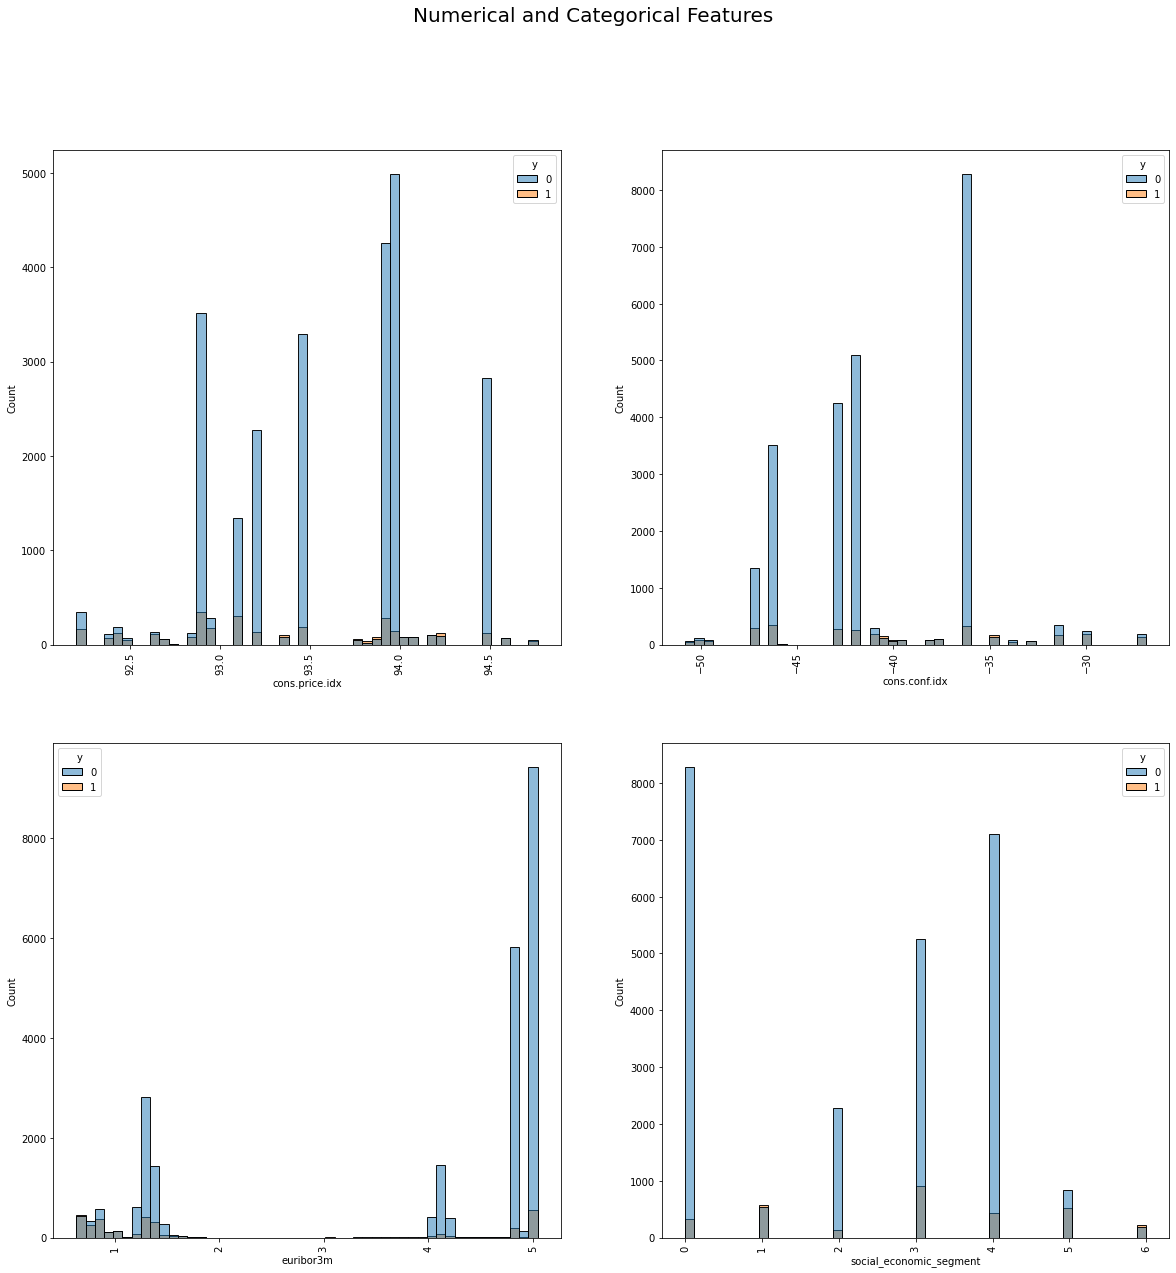

In [300]:
to_plot = social_economic_features + ["social_economic_segment"]

Xy_train = pd.concat([X_train.reset_index(drop = True),
                           y_train.reset_index(drop = True)], axis = 1)
plot_all(Xy_train, to_plot, target_name, (20, 20), 10)
plt.show()

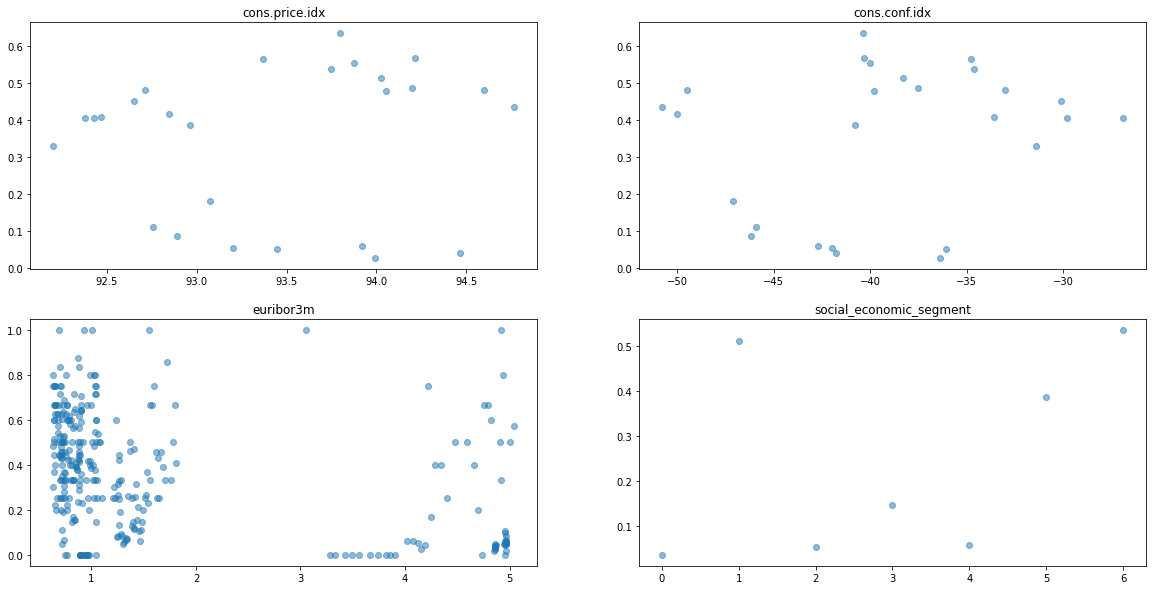

In [301]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for col, subplot in zip(to_plot, ax.flatten()):
  propension_by_col = Xy_train[[col, target_name]].groupby(col).mean()
  subplot.plot(propension_by_col, 'o', alpha=0.5)
  subplot.set_title(col)
plt.show()

Ficou mais facil entender o relacionamento dessa nova variavel com o target.  
Vamos verificar se esse novo preditor ajuda a melhorar a nossa regressao logistica.

In [302]:
# Simple engineered features
feature_engineering(X_train)
feature_engineering(X_test)

In [303]:
cat_cols = list(X_train.columns[X_train.dtypes == object])
cat_cols.append("social_economic_segment")
num_cols = list(set(X_train.columns) - set(cat_cols))

# Eval logistic regression baseline
train_eval_baseline(X_train, y_train, X_test, y_test, cat_cols, num_cols)

Accuracy on train set:  0.8968291357129915
Accuracy on test set:  0.8964908408739792
AUC on train set:  0.7843192689304219
AUC on test set:  0.7738392759617987


Nao parece ter ajudado muito o nosso modelo de regressao logistica.  
Mesmo assim, vamos deixar esse novo preditor no dataset para testar com os modelos baseados em arvores. Os modelos baseados em arvores fazem uma seleçao interna das features a mais uteis para diminuir a entropia.  
Portanto, mesmo se esse preditor fosse muito fraco, ele nao teria um impacto negativo no modelo. 

# Testar e avaliar outros modelos

O nosso dataset é desbalanceado. Vamos aproveitar da estrategia de **Sensitive learning** com o parâmetro `class weight` da biblioteca `scikit-learn`. Esse parametro é disponivel na classe do **Random Forest Classifier**.

In [304]:
def train_eval_model(model, X_train, y_train, X_test, y_test, cat_cols, num_cols):
  X_train_encoded, y_train_encoded = preprocess(X_train, y_train, cat_cols, num_cols)
  X_test_encoded, y_test_encoded = preprocess(X_test, y_test, cat_cols, num_cols)

  clf = model.fit(X_train_encoded, y_train_encoded)

  print("Accuracy on train set: ", clf.score(X_train_encoded, y_train_encoded))
  print("Accuracy on test set: ", clf.score(X_test_encoded, y_test_encoded))

  print("AUC on train set: ", roc_auc_score(y_train_encoded, clf.predict_proba(X_train_encoded)[:, 1]))
  print("AUC on test set: ", roc_auc_score(y_test_encoded, clf.predict_proba(X_test_encoded)[:, 1]))
  return clf

In [305]:
from sklearn.ensemble import RandomForestClassifier


cat_cols = list(X_train.columns[X_train.dtypes == object])
cat_cols.append("social_economic_segment")
num_cols = list(set(X_train.columns) - set(cat_cols))

model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100, max_depth=6, n_jobs=-1)
rf = train_eval_model(model, X_train, y_train, X_test, y_test, cat_cols, num_cols)

Accuracy on train set:  0.8125385033520566
Accuracy on test set:  0.8099021555212241
AUC on train set:  0.8118003266267427
AUC on test set:  0.7897805793738956


In [306]:
from xgboost import XGBClassifier


model = XGBClassifier(scale_pos_weight=90)
xb = train_eval_model(model, X_train, y_train, X_test, y_test, cat_cols, num_cols)

Accuracy on train set:  0.12857401703207103
Accuracy on test set:  0.1263885823585669
AUC on train set:  0.8123485664408154
AUC on test set:  0.7877676352255942


Poderiamos comparar mais em detalhe esses 2 modelos com hiperparametros diferentes, porem, ja que a diferença de **AUC** é minima com uma configuraçao simples, vamos optar por utilizar o **Random Forest**, menos propenso ao *overfit*.

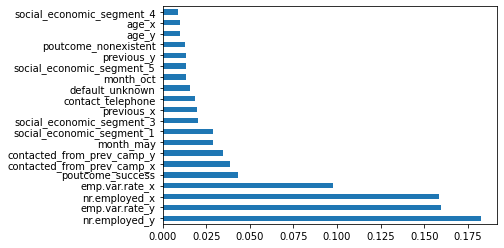

In [307]:
X_train_encoded, y_train_encoded = preprocess(X_train, y_train, cat_cols, num_cols)

# plotando as variaveis mais importantes
feat_importances = pd.Series(
    rf.feature_importances_, 
    index=X_train_encoded.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Constatamos que dessa vez, a variavel de seguimento socio-economico ajudou o modelo.  
As outras importancias de features sao consistente com o que eu apontei na fase de exploraçao das variaveis.  
Podemos perceber que o mes do ultimo contato tem um impacto forte. Seria um bom proximo passo começar a coleta de indicadores mais consistente de qualidade de ligaçao para podermos remover esse preditor `month`, muito instavel e enviesado.

So falta empacotar o codigo de preparaçao do input do modelo:

In [308]:
# y can be None
def prepare_for_modeling(X, y):
  cluster_features = kmf_hint.transform(X_train_encoded)
  # New complex engineered feature
  X["social_economic_segment"] = cluster_features
  # Simple engineered features
  feature_engineering(X)
  cat_cols = list(X.columns[X.dtypes == object])
  num_cols = list(set(X.columns) - set(cat_cols))
  X, y = preprocess(X, y, cat_cols, num_cols)
  return X, y